In [ ]:
import pandas as pd #importing pandas library
import numpy as np #inporting numpy library
import matplotlib.pyplot as plt #importing matplotlib library


In [ ]:
train_data = pd.read_csv('train.txt', sep=" ", header=None) #Reading File Named 'train.txt' with Separator ' '
train_data.columns = ["x1", "y1", "class"] #Giving Column Names

In [ ]:
print(train_data['x1'])

0     2
1     3
2    -4
3     3
4    -1
5     2
6     4
7    -2
8     0
9    -2
10   -1
11   -4
Name: x1, dtype: int64


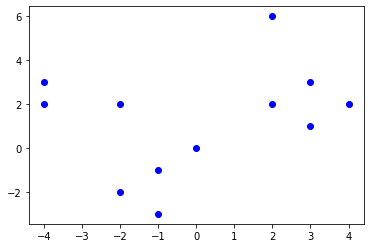

In [ ]:
plt.plot(train_data['x1'],train_data['y1'],'bo') #Plotting All Train Data

In [ ]:
b=train_data.shape #Finding The Shape of Train Dataset
print(b[0]) #Printing the  Row Numbers
RowNumber=b[0] #Assigning Row Numbers in RowNumber

#Defining 4 Lists for Train Class 1 and Class 2
train_class1_x=[]
train_class1_y=[]
train_class2_x=[]
train_class2_y=[]

#Filtering The Class 1 and Class 2 coordinates
for i in range(0,RowNumber):
    y=train_data.at[i,'class']
    if(y==1):
      train_class1_x.append(train_data.at[i,'x1'])
      train_class1_y.append(train_data.at[i,'y1'])
    else:
      train_class2_x.append(train_data.at[i,'x1'])
      train_class2_y.append(train_data.at[i,'y1'])


12


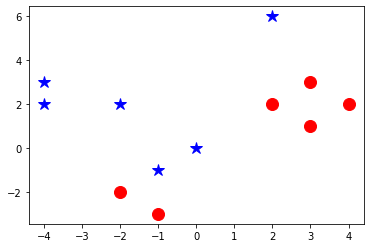

In [ ]:
#Plotting The Measured Train Class Points with Appropriate Marker
plt.plot(train_class1_x,train_class1_y, 'ro', markersize=12)
plt.plot(train_class2_x,train_class2_y, 'b*', markersize=12)

In [ ]:
# Reading Test Dataset and Give Appropriate Column Names
test_data = pd.read_csv('test.txt', sep=" ", header=None)
test_data.columns = ["x1", "y1", "class"]

#Finding The Row Numbers of Test Dataset
t=test_data.shape
print(t[0])
RowNumberTest=t[0]

7


In [ ]:
# Finding the Mean of Class 1's and Class 2's respective x and y coordinates'
train_mean_x_class1=np.mean(train_class1_x)
train_mean_y_class1=np.mean(train_class1_y)
train_mean_x_class2=np.mean(train_class2_x)
train_mean_y_class2=np.mean(train_class2_y)

#Printig the Values of Means
print(train_mean_x_class1)
print(train_mean_y_class1)
print(train_mean_x_class2)
print(train_mean_y_class2)

1.5
0.5
-1.5
2.0


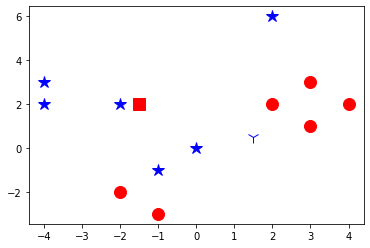

In [ ]:
#Plotting the Mean Class 1's and Class 2's points along with other points with appropriate marker
plt.plot(train_class1_x,train_class1_y, 'ro', markersize=12)
plt.plot(train_class2_x,train_class2_y, 'b*', markersize=12)
plt.plot(train_mean_x_class1,train_mean_y_class1, 'b1', markersize=12)
plt.plot(train_mean_x_class2,train_mean_y_class2, 'rs', markersize=12)

In [ ]:
#Taking 2 lists
g1=[]
g2=[]

#Findind the Values of g1 and g2 function for each values of x and y coordinates by the help of approapriate Rule
for i in range(0,RowNumberTest):
  g1.append(train_mean_x_class1*test_data.at[i,'x1'] + train_mean_y_class1*test_data.at[i,'y1']
    - (1/2)*(train_mean_x_class1*train_mean_x_class1+train_mean_y_class1*train_mean_y_class1))
  g2.append(train_mean_x_class2*test_data.at[i,'x1'] + train_mean_y_class2*test_data.at[i,'y1']
    - (1/2)*(train_mean_x_class2*train_mean_x_class2+train_mean_y_class2*train_mean_y_class2))

In [ ]:
print(g1)
print(g2)

[-5.25, 4.25, -3.75, 11.75, 7.25, -0.25, -5.75]
[-11.625, -3.625, 1.875, -11.125, -14.125, 0.875, 1.375]


In [ ]:
result_class=[]

#Finding the Appropriate Class of Test Dataset's by comparing g1 and g2
for i,j in zip(g1,g2):
  if (i>j):
    result_class.append(1)
    print(i)

  else:
    result_class.append(2)
    print(j)
print(result_class)
print(test_data)
test_data["result_class"] = result_class

-5.25
4.25
1.875
11.75
7.25
0.875
1.375
[1, 1, 2, 1, 1, 2, 2]
   x1  y1  class
0  -1  -5      1
1   3   2      1
2  -2   1      2
3   8   2      1
4   6  -1      1
5   0   2      1
6  -3   0      2


In [ ]:
print(test_data)

   x1  y1  class  result_class
0  -1  -5      1             1
1   3   2      1             1
2  -2   1      2             2
3   8   2      1             1
4   6  -1      1             1
5   0   2      1             2
6  -3   0      2             2


In [ ]:
test_class1_x=[]
test_class1_y=[]
test_class2_x=[]
test_class2_y=[]

#Putting The Values of test Class 1's and test Class 2's x and y coordinates' values in appropriate lists
for i in range(0,RowNumberTest):
    y=test_data.at[i,'result_class']
    if(y==1):
      test_class1_x.append(test_data.at[i,'x1'])
      test_class1_y.append(test_data.at[i,'y1'])
    else:
      test_class2_x.append(test_data.at[i,'x1'])
      test_class2_y.append(test_data.at[i,'y1'])

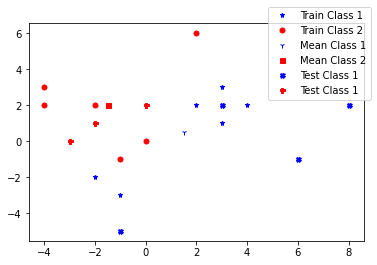

In [ ]:
#Plotting all train,test points with appropriate markers
plt.plot(train_class1_x,train_class1_y, 'b*', markersize=5,label='Train Class 1')
plt.plot(train_class2_x,train_class2_y, 'ro', markersize=5,label='Train Class 2')
plt.plot(train_mean_x_class1,train_mean_y_class1, 'b1', markersize=5,label='Mean Class 1')
plt.plot(train_mean_x_class2,train_mean_y_class2, 'rs', markersize=5,label='Mean Class 2')
plt.plot(test_class1_x,test_class1_y, 'bX', markersize=5,label='Test Class 1')
plt.plot(test_class2_x,test_class2_y, 'rP', markersize=5,label='Test Class 1')
plt.legend(bbox_to_anchor=(.7, 1.1), loc="upper left")

In [ ]:
accuracy=0
#Finding the value of correctly classified test points
for i in range(0,RowNumberTest):
  if( test_data.at[i,'result_class']==test_data.at[i,'class']):
    accuracy=accuracy+1

In [ ]:
print(accuracy)

6


In [ ]:
#Finding The Accuracy of the Model
total_accuracy=(accuracy/RowNumberTest)*100
print("Accuracy of the Model: ",total_accuracy,"%")

Accuracy of the Model:  85.71428571428571 %


In [ ]:
print(train_data['x1'])

0     2
1     3
2    -4
3     3
4    -1
5     2
6     4
7    -2
8     0
9    -2
10   -1
11   -4
Name: x1, dtype: int64


In [ ]:
#Finding The Minimum and Maximum Values of X coordinates
min_x=train_data['x1'].min()
max_x=test_data['x1'].max()

In [ ]:
#Expanding the values of X coordinates by giving differential range of 0.5
db_x=np.arange(min_x, max_x, 0.5)
print(np.arange(min_x, max_x, 0.5))


[-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5]


In [ ]:
db_y=[]

#Finding the values of corresponding Y coordinate's value by the help of appropriate rule
for value in db_x:
  db_y.append(((train_mean_x_class1 - train_mean_x_class2)*value +
               ((-0.5)*
                  (train_mean_x_class1**2 + train_mean_y_class1**2 -train_mean_x_class2**2
    - train_mean_y_class2**2))) / (-(train_mean_y_class1 - train_mean_y_class2)))


In [ ]:

print(db_y)

[-6.75, -5.75, -4.75, -3.75, -2.75, -1.75, -0.75, 0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25, 11.25, 12.25, 13.25, 14.25, 15.25, 16.25]


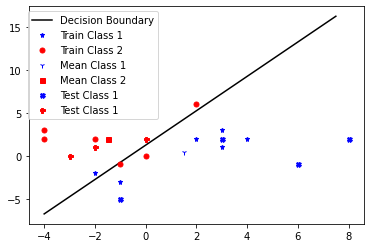

In [ ]:
#Plotting the final Model's point and decision boundary with appropriate marker
plt.plot(db_x,db_y,label='Decision Boundary',color='black')
plt.plot(train_class1_x,train_class1_y, 'b*', markersize=5,label='Train Class 1')
plt.plot(train_class2_x,train_class2_y, 'ro', markersize=5,label='Train Class 2')
plt.plot(train_mean_x_class1,train_mean_y_class1, 'b1', markersize=5,label='Mean Class 1')
plt.plot(train_mean_x_class2,train_mean_y_class2, 'rs', markersize=5,label='Mean Class 2')
plt.plot(test_class1_x,test_class1_y, 'bX', markersize=5,label='Test Class 1')
plt.plot(test_class2_x,test_class2_y, 'rP', markersize=5,label='Test Class 1')
plt.legend(bbox_to_anchor=(.4, 1), loc="upper right")
#plt.plot(db_x,db_y)